In [43]:
import numpy as np
import scipy as sp
from skimage import io, color, exposure, morphology, measure, segmentation


import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Parameters

contrast = 0.5
closing = 5

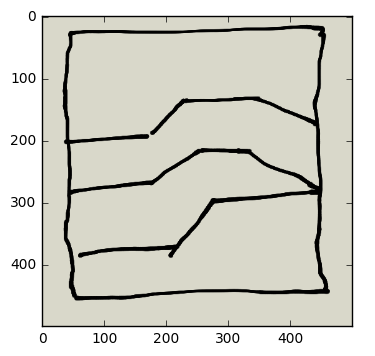

In [45]:
# IO
initial_image = io.imread("static/Breaks.png")
plt.imshow(initial_image)

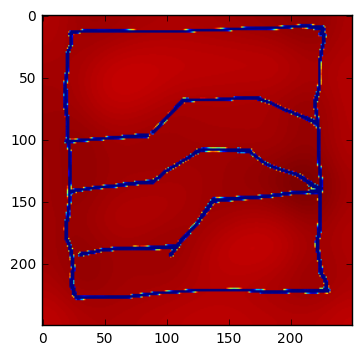

In [65]:
## Compressor
im = color.rgb2gray(initial_image[0:-1:2,0:-1:2])
flt2 = sp.ndimage.filters.gaussian_filter(im**2, 21)
compressed = im/(np.sqrt(flt2))
plt.imshow(compressed)

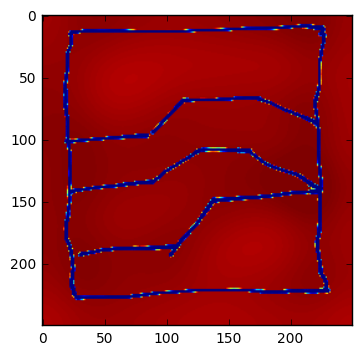

In [66]:
## Contrast streching
p2, p98 = np.percentile(compressed, (2, 98))
contrasted = exposure.rescale_intensity(compressed, in_range=(p2, p98))
plt.imshow(contrasted)

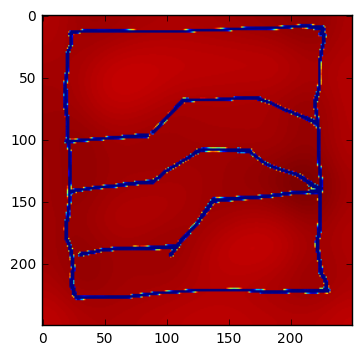

In [67]:
## Binarization with scalar threshold           
binary = ~(color.rgb2gray(contrasted) > contrast)
plt.imshow(compressed)

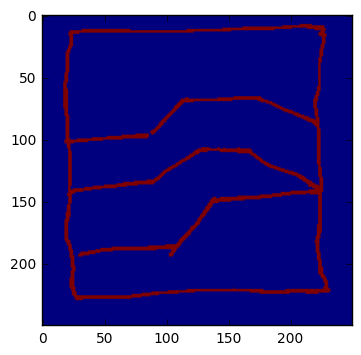

In [68]:
## Binarization with scalar threshold           
binary = ~(color.rgb2gray(contrasted) > contrast)
plt.imshow(binary)

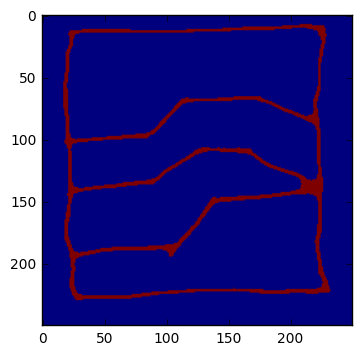

In [69]:
## Use binary closing to connect lines that aren't
## completely crossing
closed = morphology.binary_closing(binary, morphology.disk(closing))
plt.imshow(closed)

/home/epsalt/Dropbox/Code/Projects/Python/sketch2model_web/venv/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


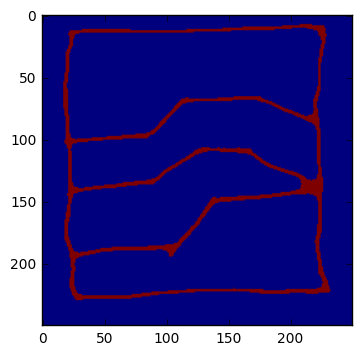

In [70]:
removed = morphology.remove_small_objects(closed)
removed = ~morphology.remove_small_objects(~removed)
plt.imshow(removed)

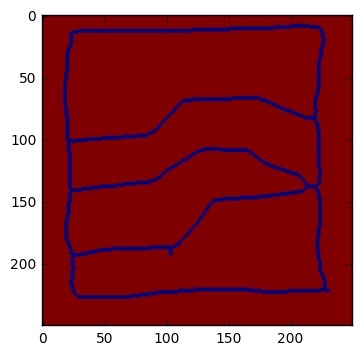

In [71]:
edges = morphology.skeletonize(removed)
skeletonized = ~morphology.dilation(edges, morphology.disk(1))
plt.imshow(skeletonized)

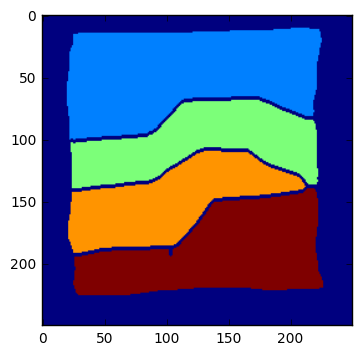

In [72]:
clean_border = segmentation.clear_border(skeletonized)
labeled, nregions = measure.label(clean_border, background = 999999, return_num=True)
labeled = labeled + 1
plt.imshow(labeled)

In [74]:
## Change border region labels to zero for random walker
## segmentation in next step
np.place(labeled, np.logical_not(skeletonized), 0) ## updates in place

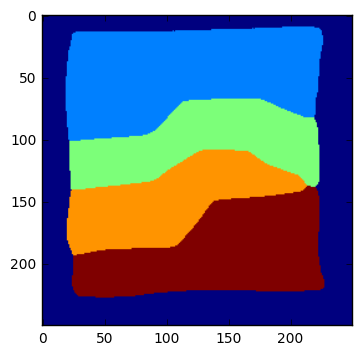

In [75]:
final = segmentation.random_walker(skeletonized, labeled, beta=1,  mode='cg_mg')
plt.imshow(final)